<a href="https://colab.research.google.com/github/AditeyaAItronics/devsoc-bits/blob/main/devsoc-ai-ml/f20240689_AIML_obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!git clone https://github.com/AditeyaAItronics/devsoc-bits


Cloning into 'devsoc-bits'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 92 (delta 28), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (92/92), 9.55 MiB | 11.11 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load dataset
df = pd.read_csv('/content/devsoc-bits/devsoc-ai-ml/dataset.csv')

# Null value analysis
print("Null values per column:")
print(df.isnull().sum())

Null values per column:
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [ ]:
# Prepare features and target
X = df.drop(['id', 'NObeyesdad'], axis=1)
y = df['NObeyesdad']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def analyze_and_impute_missing_values(df):
    print("Null values per column:")
    print(df.isnull().sum())
    # Impute missing values (numerical: mean, categorical: mode)
    for col in df.columns:
        if df[col].dtype in [np.float64, np.int64]:
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
    print("Null values after imputation:")
    print(df.isnull().sum())

In [ ]:
def analyze_data_biasness(df):
    """
    Analyze data skewness for each numerical feature and plot distributions.
    """
    print("Data Skewness Analysis:")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    skewness = df[numeric_cols].skew()
    print(skewness)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=skewness.index, y=skewness.values)
    plt.title('Skewness of Numerical Features')
    plt.ylabel('Skewness')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
def analyze_decision_tree(X_train, X_test, y_train, y_test):
    best_acc = 0
    best_params = {}
    best_metrics = {}
    print("Decision Tree parameter tuning:")
    for max_depth in [3, 5, 10, None]:
        for min_samples_split in [2, 5, 10]:
            dt = DecisionTreeClassifier(random_state=42, max_depth=max_depth, min_samples_split=min_samples_split)
            dt.fit(X_train, y_train)
            dt_pred = dt.predict(X_test)
            acc = accuracy_score(y_test, dt_pred)
            report = classification_report(y_test, dt_pred, output_dict=True)
            precision = report['weighted avg']['precision']
            recall = report['weighted avg']['recall']
            f1 = report['weighted avg']['f1-score']
            print(f"max_depth={max_depth}, min_samples_split={min_samples_split} -> "
                  f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
            if acc > best_acc:
                best_acc = acc
                best_params = {'max_depth': max_depth, 'min_samples_split': min_samples_split}
                best_metrics = {
                    'accuracy': acc,
                    'precision': precision,
                    'recall': recall,
                    'f1': f1
                }
    print(f"\nBest Decision Tree params: {best_params} with metrics:")
    print(f"Accuracy: {best_metrics['accuracy']:.4f}")
    print(f"Precision: {best_metrics['precision']:.4f}")
    print(f"Recall: {best_metrics['recall']:.4f}")
    print(f"F1: {best_metrics['f1']:.4f}")
    # Fit and show classification report for best params
    dt_best = DecisionTreeClassifier(random_state=42, **best_params)
    dt_best.fit(X_train, y_train)
    dt_pred = dt_best.predict(X_test)
    print(classification_report(y_test, dt_pred))
    return best_metrics

In [ ]:
def analyze_logistic_regression(X_train_scaled, X_test_scaled, y_train, y_test):
    best_acc = 0
    best_params = {}
    best_metrics = {}
    print("Logistic Regression parameter tuning:")
    for C in [0.01, 0.1, 1, 10]:
        for penalty in ['l2']:
            lr = LogisticRegression(max_iter=1000, random_state=42, C=C, penalty=penalty, solver='lbfgs', multi_class='auto')
            lr.fit(X_train_scaled, y_train)
            lr_pred = lr.predict(X_test_scaled)
            acc = accuracy_score(y_test, lr_pred)
            report = classification_report(y_test, lr_pred, output_dict=True)
            precision = report['weighted avg']['precision']
            recall = report['weighted avg']['recall']
            f1 = report['weighted avg']['f1-score']
            print(f"C={C}, penalty={penalty} -> Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
            if acc > best_acc:
                best_acc = acc
                best_params = {'C': C, 'penalty': penalty}
                best_metrics = {
                    'accuracy': acc,
                    'precision': precision,
                    'recall': recall,
                    'f1': f1
                }
    print(f"\nBest Logistic Regression params: {best_params} with metrics:")
    print(f"Accuracy: {best_metrics['accuracy']:.4f}")
    print(f"Precision: {best_metrics['precision']:.4f}")
    print(f"Recall: {best_metrics['recall']:.4f}")
    print(f"F1: {best_metrics['f1']:.4f}")
    # Fit and show classification report for best params
    lr_best = LogisticRegression(max_iter=1000, random_state=42, **best_params, solver='lbfgs', multi_class='auto')
    lr_best.fit(X_train_scaled, y_train)
    lr_pred = lr_best.predict(X_test_scaled)
    print(classification_report(y_test, lr_pred))
    return best_metrics

In [ ]:
def analyze_knn(X_train_scaled, X_test_scaled, y_train, y_test):
    best_acc = 0
    best_params = {}
    best_metrics = {}
    print("KNN parameter tuning:")
    for n_neighbors in [3, 5, 7, 9, 11]:
        for weights in ['uniform', 'distance']:
            for p in [1, 2]:  # 1: Manhattan, 2: Euclidean
                knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)
                knn.fit(X_train_scaled, y_train)
                knn_pred = knn.predict(X_test_scaled)
                acc = accuracy_score(y_test, knn_pred)
                report = classification_report(y_test, knn_pred, output_dict=True)
                precision = report['weighted avg']['precision']
                recall = report['weighted avg']['recall']
                f1 = report['weighted avg']['f1-score']
                print(f"n_neighbors={n_neighbors}, weights={weights}, p={p} -> "
                      f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
                if acc > best_acc:
                    best_acc = acc
                    best_params = {'n_neighbors': n_neighbors, 'weights': weights, 'p': p}
                    best_metrics = {
                        'accuracy': acc,
                        'precision': precision,
                        'recall': recall,
                        'f1': f1
                    }
    print(f"\nBest KNN params: {best_params} with metrics:")
    print(f"Accuracy: {best_metrics['accuracy']:.4f}")
    print(f"Precision: {best_metrics['precision']:.4f}")
    print(f"Recall: {best_metrics['recall']:.4f}")
    print(f"F1: {best_metrics['f1']:.4f}")
    return best_metrics

In [ ]:
def compare_model_metrics(X_train, X_test, X_train_scaled, X_test_scaled, y_train, y_test):
    # Run individual analyses and collect metrics
    print("Analyzing Decision Tree...")
    dt_metrics = analyze_decision_tree(X_train, X_test, y_train, y_test)

    print("\nAnalyzing Logistic Regression...")
    lr_metrics = analyze_logistic_regression(X_train_scaled, X_test_scaled, y_train, y_test)

    print("\nAnalyzing KNN...")
    knn_metrics = analyze_knn(X_train_scaled, X_test_scaled, y_train, y_test)

    # Collect results
    results = [
        {"Model": "Decision Tree", **dt_metrics},
        {"Model": "Logistic Regression", **lr_metrics},
        {"Model": "KNN", **knn_metrics}
    ]

    results_df = pd.DataFrame(results)
    print("\nModel Comparison:")
    print(results_df)
    results_df.plot(x='Model', y=['accuracy', 'precision', 'recall', 'f1'], kind='bar', figsize=(10,6))
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.show()

    # Recommend the best model based on accuracy
    best_idx = results_df['accuracy'].idxmax()
    best_model = results_df.loc[best_idx, 'Model']
    best_metrics = results_df.loc[best_idx].to_dict()
    print(f"\nRecommended Model: {best_model}")
    print("Recommended Model Metrics:")
    for metric, value in best_metrics.items():
        if metric != 'Model':
            print(f"{metric.capitalize()}: {value:.4f}")


Null values per column:
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
Null values after imputation:
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                             

C:\Users\amitk\AppData\Local\Temp\ipykernel_20208\1677019472.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\amitk\AppData\Local\Temp\ipykernel_20208\1677019472.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

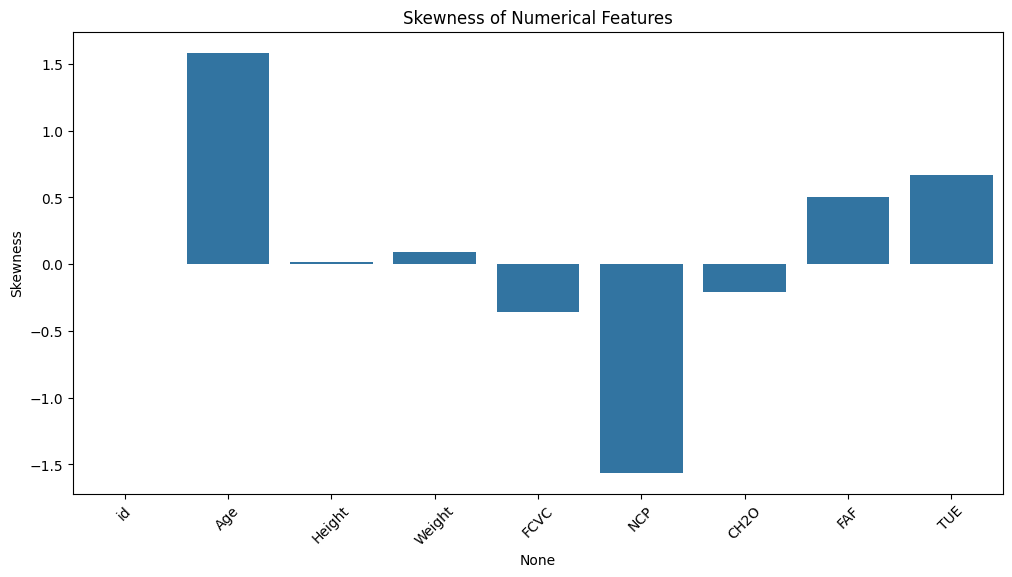

In [ ]:
# Load dataset and do the nal
analyze_and_impute_missing_values(df)
analyze_data_biasness(df)

In [ ]:
# Run analyses
analyze_decision_tree(X_train, X_test, y_train, y_test)
analyze_logistic_regression(X_train_scaled, X_test_scaled, y_train, y_test)
analyze_knn(X_train_scaled, X_test_scaled, y_train, y_test)

Decision Tree parameter tuning:
max_depth=3, min_samples_split=2 -> Accuracy: 0.7312, Precision: 0.6865, Recall: 0.7312, F1: 0.6929


c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

max_depth=3, min_samples_split=5 -> Accuracy: 0.7312, Precision: 0.6865, Recall: 0.7312, F1: 0.6929
max_depth=3, min_samples_split=10 -> Accuracy: 0.7312, Precision: 0.6865, Recall: 0.7312, F1: 0.6929


c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


max_depth=5, min_samples_split=2 -> Accuracy: 0.8343, Precision: 0.8467, Recall: 0.8343, F1: 0.8359
max_depth=5, min_samples_split=5 -> Accuracy: 0.8343, Precision: 0.8467, Recall: 0.8343, F1: 0.8359
max_depth=5, min_samples_split=10 -> Accuracy: 0.8343, Precision: 0.8467, Recall: 0.8343, F1: 0.8359
max_depth=10, min_samples_split=2 -> Accuracy: 0.8731, Precision: 0.8724, Recall: 0.8731, F1: 0.8726
max_depth=10, min_samples_split=5 -> Accuracy: 0.8733, Precision: 0.8729, Recall: 0.8733, F1: 0.8729
max_depth=10, min_samples_split=10 -> Accuracy: 0.8745, Precision: 0.8742, Recall: 0.8745, F1: 0.8742
max_depth=None, min_samples_split=2 -> Accuracy: 0.8425, Precision: 0.8427, Recall: 0.8425, F1: 0.8425
max_depth=None, min_samples_split=5 -> Accuracy: 0.8451, Precision: 0.8447, Recall: 0.8451, F1: 0.8447
max_depth=None, min_samples_split=10 -> Accuracy: 0.8572, Precision: 0.8563, Recall: 0.8572, F1: 0.8566

Best Decision Tree params: {'max_depth': 10, 'min_samples_split': 10} with metrics:


c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


C=0.01, penalty=l2 -> Accuracy: 0.7671, Precision: 0.7555, Recall: 0.7671, F1: 0.7578


c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


C=0.1, penalty=l2 -> Accuracy: 0.8418, Precision: 0.8381, Recall: 0.8418, F1: 0.8391


c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


C=1, penalty=l2 -> Accuracy: 0.8685, Precision: 0.8671, Recall: 0.8685, F1: 0.8673


c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


C=10, penalty=l2 -> Accuracy: 0.8726, Precision: 0.8714, Recall: 0.8726, F1: 0.8716

Best Logistic Regression params: {'C': 10, 'penalty': 'l2'} with metrics:
Accuracy: 0.8726
Precision: 0.8714
Recall: 0.8726
F1: 0.8716


c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.95      0.92       505
      Normal_Weight       0.88      0.82      0.85       617
     Obesity_Type_I       0.81      0.85      0.83       582
    Obesity_Type_II       0.94      0.96      0.95       650
   Obesity_Type_III       1.00      1.00      1.00       809
 Overweight_Level_I       0.76      0.72      0.74       485
Overweight_Level_II       0.74      0.72      0.73       504

           accuracy                           0.87      4152
          macro avg       0.86      0.86      0.86      4152
       weighted avg       0.87      0.87      0.87      4152

KNN parameter tuning:
n_neighbors=3, weights=uniform, p=1 -> Accuracy: 0.7702, Precision: 0.7690, Recall: 0.7702, F1: 0.7663
n_neighbors=3, weights=uniform, p=2 -> Accuracy: 0.7394, Precision: 0.7375, Recall: 0.7394, F1: 0.7354
n_neighbors=3, weights=distance, p=1 -> Accuracy: 0.7784, Precision: 0.7758, Recall: 0.7784, F1: 0

{'accuracy': 0.7964836223506744,
 'precision': 0.7946003623508606,
 'recall': 0.7964836223506744,
 'f1': 0.7948738500623977}

Analyzing Decision Tree...
Decision Tree parameter tuning:
max_depth=3, min_samples_split=2 -> Accuracy: 0.7312, Precision: 0.6865, Recall: 0.7312, F1: 0.6929
max_depth=3, min_samples_split=5 -> Accuracy: 0.7312, Precision: 0.6865, Recall: 0.7312, F1: 0.6929


c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

max_depth=3, min_samples_split=10 -> Accuracy: 0.7312, Precision: 0.6865, Recall: 0.7312, F1: 0.6929
max_depth=5, min_samples_split=2 -> Accuracy: 0.8343, Precision: 0.8467, Recall: 0.8343, F1: 0.8359
max_depth=5, min_samples_split=5 -> Accuracy: 0.8343, Precision: 0.8467, Recall: 0.8343, F1: 0.8359
max_depth=5, min_samples_split=10 -> Accuracy: 0.8343, Precision: 0.8467, Recall: 0.8343, F1: 0.8359
max_depth=10, min_samples_split=2 -> Accuracy: 0.8731, Precision: 0.8724, Recall: 0.8731, F1: 0.8726
max_depth=10, min_samples_split=5 -> Accuracy: 0.8733, Precision: 0.8729, Recall: 0.8733, F1: 0.8729
max_depth=10, min_samples_split=10 -> Accuracy: 0.8745, Precision: 0.8742, Recall: 0.8745, F1: 0.8742
max_depth=None, min_samples_split=2 -> Accuracy: 0.8425, Precision: 0.8427, Recall: 0.8425, F1: 0.8425
max_depth=None, min_samples_split=5 -> Accuracy: 0.8451, Precision: 0.8447, Recall: 0.8451, F1: 0.8447
max_depth=None, min_samples_split=10 -> Accuracy: 0.8572, Precision: 0.8563, Recall: 0.8

c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


C=0.01, penalty=l2 -> Accuracy: 0.7671, Precision: 0.7555, Recall: 0.7671, F1: 0.7578


c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


C=0.1, penalty=l2 -> Accuracy: 0.8418, Precision: 0.8381, Recall: 0.8418, F1: 0.8391


c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


C=1, penalty=l2 -> Accuracy: 0.8685, Precision: 0.8671, Recall: 0.8685, F1: 0.8673


c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


C=10, penalty=l2 -> Accuracy: 0.8726, Precision: 0.8714, Recall: 0.8726, F1: 0.8716

Best Logistic Regression params: {'C': 10, 'penalty': 'l2'} with metrics:
Accuracy: 0.8726
Precision: 0.8714
Recall: 0.8726
F1: 0.8716


c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.95      0.92       505
      Normal_Weight       0.88      0.82      0.85       617
     Obesity_Type_I       0.81      0.85      0.83       582
    Obesity_Type_II       0.94      0.96      0.95       650
   Obesity_Type_III       1.00      1.00      1.00       809
 Overweight_Level_I       0.76      0.72      0.74       485
Overweight_Level_II       0.74      0.72      0.73       504

           accuracy                           0.87      4152
          macro avg       0.86      0.86      0.86      4152
       weighted avg       0.87      0.87      0.87      4152


Analyzing KNN...
KNN parameter tuning:
n_neighbors=3, weights=uniform, p=1 -> Accuracy: 0.7702, Precision: 0.7690, Recall: 0.7702, F1: 0.7663
n_neighbors=3, weights=uniform, p=2 -> Accuracy: 0.7394, Precision: 0.7375, Recall: 0.7394, F1: 0.7354
n_neighbors=3, weights=distance, p=1 -> Accuracy: 0.7784, Precision: 0.7758, Rec

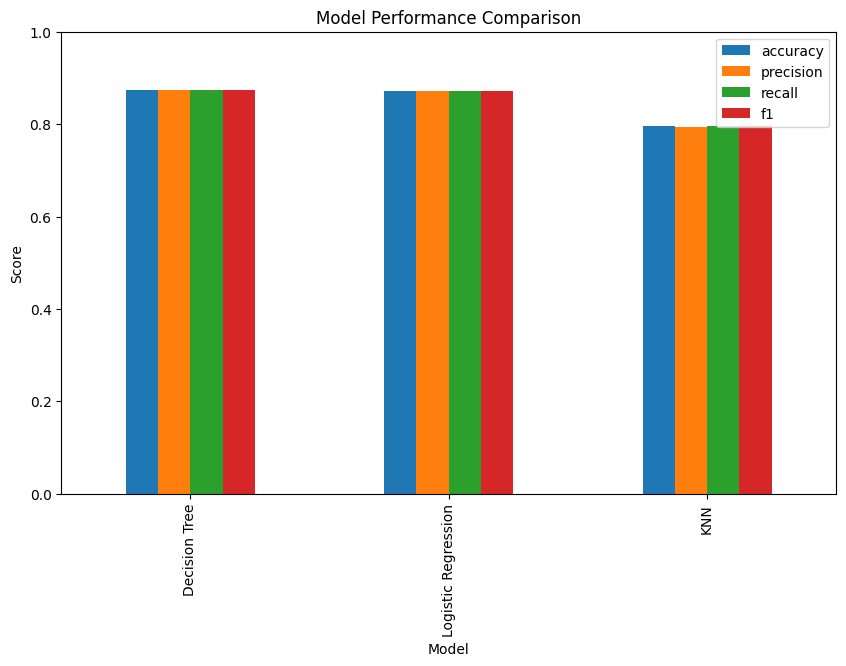


Recommended Model: Decision Tree
Recommended Model Metrics:
Accuracy: 0.8745
Precision: 0.8742
Recall: 0.8745
F1: 0.8742


In [ ]:
compare_model_metrics(X_train, X_test, X_train_scaled, X_test_scaled, y_train, y_test)

## Bagging (Bootstrap Aggregating)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from scipy.stats import mode

# Define parameter grid for Random Forest
param_grid = [
    {'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 2},
    {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5},
    {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 10},
    {'n_estimators': 150, 'max_depth': 7, 'min_samples_split': 3},
    {'n_estimators': 120, 'max_depth': 15, 'min_samples_split': 2}
]

def train_random_forest_ensemble(X_train, y_train, X_test, param_grid):
    """
    Trains multiple Random Forest models on different random subsets of the data.
    Returns the list of models and their predictions on X_test.
    """
    rf_models = []
    rf_preds = []
    for i, params in enumerate(param_grid):
        idx = np.random.choice(X_train.index, size=int(0.8 * len(X_train)), replace=True)
        X_sub = X_train.loc[idx]
        y_sub = y_train.loc[idx]
        rf = RandomForestClassifier(
            n_estimators=params['n_estimators'],
            max_depth=params['max_depth'],
            min_samples_split=params['min_samples_split'],
            random_state=42 + i,
            n_jobs=-1
        )
        rf.fit(X_sub, y_sub)
        rf_models.append(rf)
        rf_preds.append(rf.predict(X_test))
    rf_preds = np.array(rf_preds)
    return rf_models, rf_preds

# def predict_with_ensemble(rf_preds, y_test):
#     """
#     Performs majority voting on predictions and prints the classification report.
#     """
#     final_rf_pred, _ = mode(rf_preds, axis=0, keepdims=False)
#     print(classification_report(y_test, final_rf_pred))
#     return final_rf_pred
def predict_with_ensemble(rf_preds, y_test):
    """
    Performs majority voting on predictions and prints the classification report.
    """
    # Use pandas for mode to support string labels
    preds_df = pd.DataFrame(rf_preds)
    final_rf_pred = preds_df.mode(axis=0).iloc[0].values
    print(classification_report(y_test, final_rf_pred))
    return final_rf_pred


In [ ]:
# Run bagging and prediction
rf_models, rf_preds = train_random_forest_ensemble(X_train, y_train, X_test, param_grid)
print("Bagging (Random Forest Ensemble) Results (Majority Vote):")
final_rf_pred = predict_with_ensemble(rf_preds, y_test)

Bagging (Random Forest Ensemble) Results (Majority Vote):
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.93      0.92       505
      Normal_Weight       0.79      0.89      0.84       617
     Obesity_Type_I       0.86      0.89      0.87       582
    Obesity_Type_II       0.96      0.97      0.97       650
   Obesity_Type_III       1.00      1.00      1.00       809
 Overweight_Level_I       0.84      0.62      0.72       485
Overweight_Level_II       0.78      0.80      0.79       504

           accuracy                           0.89      4152
          macro avg       0.88      0.87      0.87      4152
       weighted avg       0.89      0.89      0.88      4152



In [ ]:
def sample_rf_prediction(X_test, y_test, rf_models, sample_size=5):
    """
    Take a random sample from X_test, predict using the ensemble, and compare with actual output.
    """
    sample_idx = np.random.choice(X_test.index, size=sample_size, replace=False)
    X_sample = X_test.loc[sample_idx]
    y_actual = y_test.loc[sample_idx]
    preds = np.array([rf.predict(X_sample) for rf in rf_models])
    preds_df = pd.DataFrame(preds)
    final_pred = preds_df.mode(axis=0).iloc[0].values
    result_df = pd.DataFrame({
        'Actual': y_actual.values,
        'Predicted': final_pred
    }, index=sample_idx)
    print("Sample predictions vs actual:")
    print(result_df)
    print("\nClassification report for the sample:")
    print(classification_report(y_actual, final_pred))




In [ ]:
# Example usage:
sample_rf_prediction(X_test, y_test, rf_models, sample_size=5)

Sample predictions vs actual:
                 Actual         Predicted
10826   Obesity_Type_II    Obesity_Type_I
16051  Obesity_Type_III  Obesity_Type_III
15241    Obesity_Type_I    Obesity_Type_I
368     Obesity_Type_II   Obesity_Type_II
431     Obesity_Type_II   Obesity_Type_II

Classification report for the sample:
                  precision    recall  f1-score   support

  Obesity_Type_I       0.50      1.00      0.67         1
 Obesity_Type_II       1.00      0.67      0.80         3
Obesity_Type_III       1.00      1.00      1.00         1

        accuracy                           0.80         5
       macro avg       0.83      0.89      0.82         5
    weighted avg       0.90      0.80      0.81         5



### **2. Boosting**

- Models are trained **sequentially**, each focusing on the previous model’s errors.
- Final prediction: **weighted combination** of all models.
- 📌 *Popular Algorithms:* AdaBoost, Gradient Boosting, XGBoost, LightGBM

In [ ]:
# After training your XGBoost model (e.g., xgb_clf)
# xgb_pred is an array of predictions, not a model. You need to pass the trained model.
# If you want to use the best XGBoost model for prediction, return the model from train_xgboost_classifier.

# Modify train_xgboost_classifier to also return the best model:
def train_xgboost_classifier(X_train, y_train, X_test, y_test):
    """
    Trains an XGBoost classifier and prints the classification report.
    Returns the best model and its predictions.
    """
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    y_test_enc = le.transform(y_test)

    param_grid = [
        {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1},
        {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05},
        {'n_estimators': 150, 'max_depth': 4, 'learning_rate': 0.07}
    ]

    best_acc = 0
    best_params = None
    best_pred = None
    best_model = None

    for params in param_grid:
        xgb_clf = xgb.XGBClassifier(
            n_estimators=params['n_estimators'],
            max_depth=params['max_depth'],
            learning_rate=params['learning_rate'],
            use_label_encoder=False,
            eval_metric='mlogloss',
            random_state=42
        )
        xgb_clf.fit(X_train, y_train_enc)
        preds = xgb_clf.predict(X_test)
        acc = accuracy_score(y_test_enc, preds)
        print(f"Params: {params} -> Accuracy: {acc:.4f}")
        if acc > best_acc:
            best_acc = acc
            best_params = params
            best_pred = preds
            best_model = xgb_clf

    print(f"\nBest XGBoost params: {best_params} with Accuracy: {best_acc:.4f}")
    print("Classification Report (XGBoost):")
    print(classification_report(y_test_enc, best_pred, target_names=le.classes_))

    return best_model, le

# Train and get the best model and label encoder
xgb_model, le = train_xgboost_classifier(X_train, y_train, X_test, y_test)



c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:45:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Params: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1} -> Accuracy: 0.8960


c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:45:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Params: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05} -> Accuracy: 0.9078


c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:45:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Params: {'n_estimators': 150, 'max_depth': 4, 'learning_rate': 0.07} -> Accuracy: 0.9063

Best XGBoost params: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05} with Accuracy: 0.9078
Classification Report (XGBoost):
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.95      0.94       505
      Normal_Weight       0.88      0.90      0.89       617
     Obesity_Type_I       0.89      0.90      0.89       582
    Obesity_Type_II       0.96      0.97      0.97       650
   Obesity_Type_III       1.00      1.00      1.00       809
 Overweight_Level_I       0.82      0.75      0.78       485
Overweight_Level_II       0.80      0.82      0.81       504

           accuracy                           0.91      4152
          macro avg       0.90      0.90      0.90      4152
       weighted avg       0.91      0.91      0.91      4152



In [ ]:
def test_xgboost_on_sample(X_test, y_test, xgb_model, le, sample_size=5):
    """
    Take a random sample from X_test, predict using the trained XGBoost model,
    and compare with actual output.
    """
    import numpy as np
    import pandas as pd
    from sklearn.metrics import classification_report

    sample_idx = np.random.choice(X_test.index, size=sample_size, replace=False)
    X_sample = X_test.loc[sample_idx]
    y_actual = y_test.loc[sample_idx]

    # Encode actual labels for comparison
    y_actual_enc = le.transform(y_actual)
    y_pred_enc = xgb_model.predict(X_sample)
    y_pred = le.inverse_transform(y_pred_enc)

    result_df = pd.DataFrame({
        'Actual': y_actual.values,
        'Predicted': y_pred
    }, index=sample_idx)
    print("Sample predictions vs actual:")
    print(result_df)
    print("\nClassification report for the sample:")
    print(classification_report(y_actual, y_pred))

# Example usage:
test_xgboost_on_sample(X_test, y_test, xgb_model, le, sample_size=5)

Sample predictions vs actual:
                    Actual            Predicted
7719   Insufficient_Weight  Insufficient_Weight
15972       Obesity_Type_I  Overweight_Level_II
4153      Obesity_Type_III     Obesity_Type_III
287       Obesity_Type_III     Obesity_Type_III
16157       Obesity_Type_I       Obesity_Type_I

Classification report for the sample:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00         1
     Obesity_Type_I       1.00      0.50      0.67         2
   Obesity_Type_III       1.00      1.00      1.00         2
Overweight_Level_II       0.00      0.00      0.00         0

           accuracy                           0.80         5
          macro avg       0.75      0.62      0.67         5
       weighted avg       1.00      0.80      0.87         5



c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **3. Stacking (Stacked Generalization)**

- Combines multiple base models using a **meta-learner** trained on their outputs.
- Base models learn from the original data; the meta-learner learns from their predictions.

In [ ]:
from sklearn.model_selection import GridSearchCV

def stacking_with_optimal_params(X_train_scaled, X_test_scaled, y_train, y_test):
    """
    Runs grid search for each base learner and meta-learner, fits a stacking classifier,
    prints the classification report, and returns the trained stacking classifier.
    """
    # 1. Decision Tree: Grid Search for best hyperparameters
    dt_param_grid = {
        'max_depth': [3, 5, 7, 10, None],
        'min_samples_split': [2, 5, 10]
    }
    dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, n_jobs=-1)
    dt_grid.fit(X_train_scaled, y_train)
    best_dt = dt_grid.best_estimator_
    print("Best Decision Tree params:", dt_grid.best_params_)

    # 2. Logistic Regression: Grid Search for best hyperparameters
    lr_param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['lbfgs'],
        'max_iter': [1000]
    }
    lr_grid = GridSearchCV(LogisticRegression(random_state=42, multi_class='auto'), lr_param_grid, cv=5, n_jobs=-1)
    lr_grid.fit(X_train_scaled, y_train)
    best_lr = lr_grid.best_estimator_
    print("Best Logistic Regression params:", lr_grid.best_params_)

    # 3. KNN: Grid Search for best hyperparameters
    knn_param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }
    knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, n_jobs=-1)
    knn_grid.fit(X_train_scaled, y_train)
    best_knn = knn_grid.best_estimator_
    print("Best KNN params:", knn_grid.best_params_)

    # 4. Meta-learner (Logistic Regression): Grid Search for best hyperparameters
    meta_param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['lbfgs'],
        'max_iter': [1000]
    }
    meta_grid = GridSearchCV(LogisticRegression(random_state=42, multi_class='auto'), meta_param_grid, cv=5, n_jobs=-1)
    meta_grid.fit(X_train_scaled, y_train)
    best_meta = meta_grid.best_estimator_
    print("Best Meta-learner (Logistic Regression) params:", meta_grid.best_params_)

    # Stacking Classifier with optimal base learners and meta-learner
    stacking_clf = StackingClassifier(
        estimators=[
            ('dt', best_dt),
            ('lr', best_lr),
            ('knn', best_knn)
        ],
        final_estimator=best_meta,
        n_jobs=-1
    )

    # Fit stacking classifier
    stacking_clf.fit(X_train_scaled, y_train)

    # Predict and evaluate
    stack_pred = stacking_clf.predict(X_test_scaled)
    print("Stacking Classifier Results (with optimal parameters):")
    print(classification_report(y_test, stack_pred))

    return stacking_clf

# Call the function and get the trained stacking classifier
stacking_clf = stacking_with_optimal_params(X_train_scaled, X_test_scaled, y_train, y_test)

Best Decision Tree params: {'max_depth': 10, 'min_samples_split': 10}


c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Logistic Regression params: {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [       nan 0.7596054  0.72738824 0.73365129        nan 0.76863825
 0.73178375 0.73876976        nan 0.77538277 0.73039873 0.7408771
        nan 0.77646676 0.73039889 0.74033513        nan 0.77652689
 0.73100109 0.74075702]
  warnings.warn(


Best KNN params: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}


c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Meta-learner (Logistic Regression) params: {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Stacking Classifier Results (with optimal parameters):
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.95      0.93       505
      Normal_Weight       0.88      0.86      0.87       617
     Obesity_Type_I       0.86      0.88      0.87       582
    Obesity_Type_II       0.96      0.96      0.96       650
   Obesity_Type_III       1.00      1.00      1.00       809
 Overweight_Level_I       0.78      0.75      0.77       485
Overweight_Level_II       0.79      0.79      0.79       504

           accuracy                           0.89      4152
          macro avg       0.88      0.88      0.88      4152
       weighted avg       0.89      0.89      0.89      4152



In [ ]:
def test_stacking_on_sample(X_test_scaled, y_test, stacking_clf, sample_size=5):
    """
    Take a random sample from X_test_scaled, predict using the trained stacking classifier,
    and compare with actual output.
    """
    import numpy as np
    import pandas as pd
    from sklearn.metrics import classification_report

    # Randomly sample indices
    sample_idx = np.random.choice(range(X_test_scaled.shape[0]), size=sample_size, replace=False)
    X_sample = X_test_scaled[sample_idx]
    y_actual = y_test.iloc[sample_idx]

    # Predict
    y_pred = stacking_clf.predict(X_sample)

    # Prepare result DataFrame
    result_df = pd.DataFrame({
        'Actual': y_actual.values,
        'Predicted': y_pred
    }, index=sample_idx)
    print("Sample predictions vs actual:")
    print(result_df)
    print("\nClassification report for the sample:")
    print(classification_report(y_actual, y_pred))

# Example usage:
test_stacking_on_sample(X_test_scaled, y_test, stacking_clf, sample_size=5)

Sample predictions vs actual:
                   Actual            Predicted
1069        Normal_Weight        Normal_Weight
3326  Overweight_Level_II  Overweight_Level_II
580         Normal_Weight  Insufficient_Weight
2699       Obesity_Type_I       Obesity_Type_I
2528       Obesity_Type_I  Overweight_Level_II

Classification report for the sample:
                     precision    recall  f1-score   support

Insufficient_Weight       0.00      0.00      0.00         0
      Normal_Weight       1.00      0.50      0.67         2
     Obesity_Type_I       1.00      0.50      0.67         2
Overweight_Level_II       0.50      1.00      0.67         1

           accuracy                           0.60         5
          macro avg       0.62      0.50      0.50         5
       weighted avg       0.90      0.60      0.67         5



c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amitk\anaconda3\envs\adibits1\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Evaluation Criteria

- Split the dataset into **training and testing sets** (e.g., 80/20 split or use cross-validation).
- Use key metrics to evaluate performance:
    - **Accuracy**
    - **Precision**
    - **Recall**
    - **F1-score**
    - **Confusion matrix** for multi-class evaluation
- Clearly present your results using **tables and/or plots**.
- Compare ensemble methods against your **baseline model**.

Confusion Matrix (Best Decision Tree):
[[462  42   0   0   0   1   0]
 [ 43 525   2   0   0  40   7]
 [  1   0 505  20   3  16  37]
 [  0   0  31 619   0   0   0]
 [  0   0   5   2 802   0   0]
 [  1  69  10   0   0 344  61]
 [  0  12  49   3   0  66 374]]
Confusion Matrix (Random Forest Ensemble):
[[469  35   0   0   0   1   0]
 [ 40 552   1   0   0  16   8]
 [  1   3 517  19   3   8  31]
 [  0   0  20 629   0   0   1]
 [  0   1   1   1 806   0   0]
 [  1  88  18   0   0 302  76]
 [  0  23  44   3   0  32 402]]
Confusion Matrix (Stacking Meta-Learner):
[[478  26   0   0   0   1   0]
 [ 39 532   2   0   0  40   4]
 [  1   0 513  19   2  10  37]
 [  0   0  28 622   0   0   0]
 [  0   0   2   1 806   0   0]
 [  1  45  11   0   0 366  62]
 [  0   4  42   6   0  54 398]]

Model Comparison Table:
                    Model  accuracy  precision    recall        f1
0      Best Decision Tree  0.874518   0.874233  0.874518  0.874173
1  Random Forest Ensemble  0.885597   0.886684  0.885597  0.883

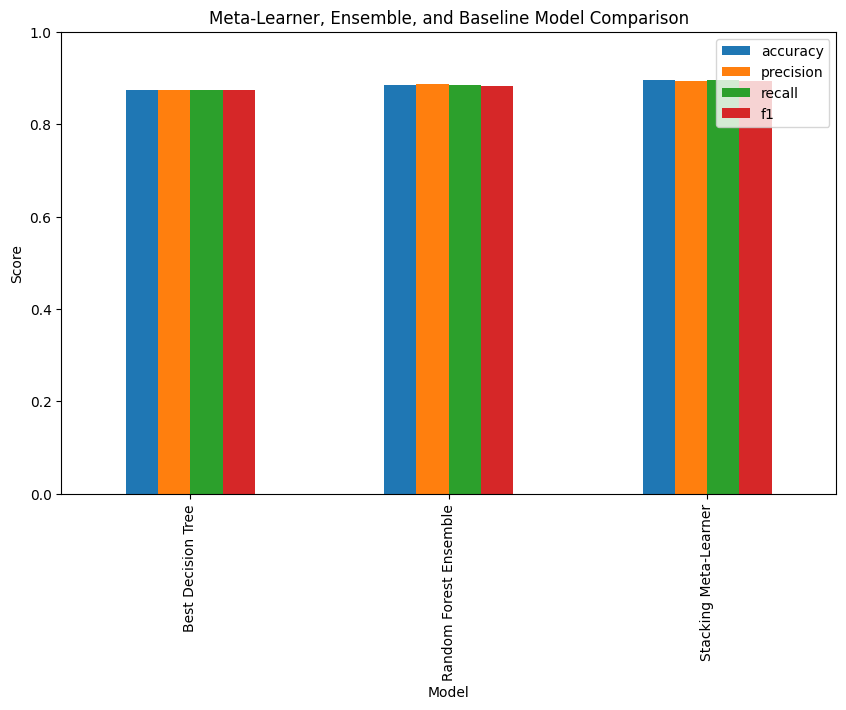

In [ ]:
def compare_all_models(X_train, X_test, X_train_scaled, X_test_scaled, y_train, y_test, rf_preds, stacking_clf):
    """
    Compare the best baseline model, ensemble learner, and stacking meta-learner.
    Prints metrics and plots a comparison bar chart.
    """
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

    # 1. Best Baseline Model (Decision Tree with best params found earlier)
    dt_best = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=10)
    dt_best.fit(X_train, y_train)
    dt_pred = dt_best.predict(X_test)
    baseline_metrics = {
        "Model": "Best Decision Tree",
        "accuracy": accuracy_score(y_test, dt_pred),
        "precision": precision_score(y_test, dt_pred, average='weighted'),
        "recall": recall_score(y_test, dt_pred, average='weighted'),
        "f1": f1_score(y_test, dt_pred, average='weighted')
    }
    print("Confusion Matrix (Best Decision Tree):")
    print(confusion_matrix(y_test, dt_pred))

    # 2. Ensemble Learner (Bagging - Random Forest Ensemble)
    rf_pred = pd.DataFrame(rf_preds).mode(axis=0).iloc[0].values
    ensemble_metrics = {
        "Model": "Random Forest Ensemble",
        "accuracy": accuracy_score(y_test, rf_pred),
        "precision": precision_score(y_test, rf_pred, average='weighted'),
        "recall": recall_score(y_test, rf_pred, average='weighted'),
        "f1": f1_score(y_test, rf_pred, average='weighted')
    }
    print("Confusion Matrix (Random Forest Ensemble):")
    print(confusion_matrix(y_test, rf_pred))

    # 3. Meta-Learner (Stacking)
    stack_pred = stacking_clf.predict(X_test_scaled)
    meta_metrics = {
        "Model": "Stacking Meta-Learner",
        "accuracy": accuracy_score(y_test, stack_pred),
        "precision": precision_score(y_test, stack_pred, average='weighted'),
        "recall": recall_score(y_test, stack_pred, average='weighted'),
        "f1": f1_score(y_test, stack_pred, average='weighted')
    }
    print("Confusion Matrix (Stacking Meta-Learner):")
    print(confusion_matrix(y_test, stack_pred))

    # Combine and plot
    results_df = pd.DataFrame([baseline_metrics, ensemble_metrics, meta_metrics])
    print("\nModel Comparison Table:")
    print(results_df)
    results_df.plot(x='Model', y=['accuracy', 'precision', 'recall', 'f1'], kind='bar', figsize=(10,6))
    plt.title('Meta-Learner, Ensemble, and Baseline Model Comparison')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.show()

# Call the function
compare_all_models(X_train, X_test, X_train_scaled, X_test_scaled, y_train, y_test, rf_preds, stacking_clf)